In [34]:
%matplotlib inline

import struct
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [29]:
class srtmParser(object):
 
    def parseFile(self,filename):
        # read 1,442,401 (1201x1201) high-endian
        # signed 16-bit words into self.z
        fi=open(filename,"rb")
        contents=fi.read()
        fi.close()
        self.z=struct.unpack(">1442401H", contents)
 
    def writeCSV(self,filename):
        if self.z :
            fo=open(filename,"w")
            for row in range(0,1201):
                offset=row*1201
                thisrow=self.z[offset:offset+1201]
                rowdump = ",".join([str(z) for z in thisrow])
                fo.write("%s\n" % rowdump)
            fo.close()
        else:
            return None

In [45]:
srtmparser = srtmParser()
srtmparser.parseFile(r".\data\goldenElevData\N40W106.hgt") 
srtmparser.writeCSV(r".\data\goldenElevData\N40W106.csv")

srtmparser = srtmParser()
srtmparser.parseFile(r".\data\goldenElevData\N39W106.hgt") 
srtmparser.writeCSV(r".\data\goldenElevData\N39W106.csv")

srtmparser = srtmParser()
srtmparser.parseFile(r".\data\goldenElevData\N39W105.hgt") 
srtmparser.writeCSV(r".\data\goldenElevData\N39W105.csv")

srtmparser = srtmParser()
srtmparser.parseFile(r".\data\goldenElevData\N40W105.hgt") 
srtmparser.writeCSV(r".\data\goldenElevData\N40W105.csv")


In [56]:
my_data1 = np.arctan((genfromtxt('./data/goldenElevData/N40W106.csv', delimiter=',')))
my_data2 = np.arctan((genfromtxt('./data/goldenElevData/N39W106.csv', delimiter=',')))
my_data3 = np.arctan((genfromtxt('./data/goldenElevData/N40W105.csv', delimiter=',')))
my_data4 = np.arctan((genfromtxt('./data/goldenElevData/N39W105.csv', delimiter=',')))

my_dataL = np.concatenate((my_data1,my_data2))
my_dataR = np.concatenate((my_data3,my_data4))

my_data = np.concatenate((my_dataL, my_dataR), axis = 1)

In [55]:
a = np.shape(my_dataL)
b = np.shape(my_dataR)
print(a,b)

(2402, 1201) (2402, 1201)


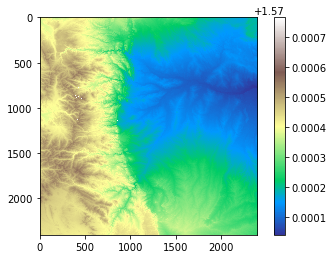

In [57]:
imgplot = plt.imshow(my_data)
imgplot.set_cmap('terrain')
plt.colorbar()